# Decision Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
data=pd.read_csv('job_offers.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CGPA              20 non-null     int64
 1   Communication     20 non-null     int64
 2   Aptitude          20 non-null     int64
 3   ProgrammingSkill  20 non-null     int64
 4   JobOffered        20 non-null     int64
dtypes: int64(5)
memory usage: 932.0 bytes


In [4]:
x=data.drop('JobOffered',axis=1)  #features
y=data['JobOffered']              #label

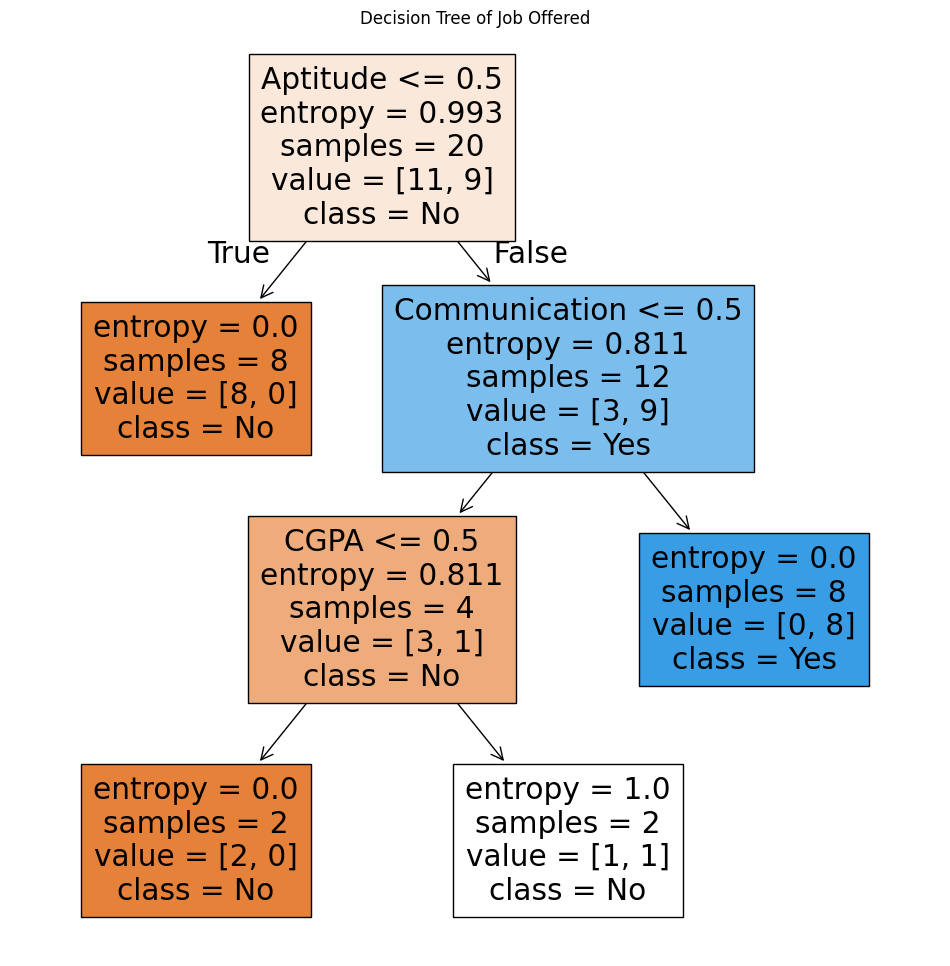

In [5]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=3)

dtree.fit(x,y)

y_pred=dtree.predict(x)

plt.figure(figsize=(12,12))
plot_tree(dtree,filled=True,feature_names=['CGPA','Communication','Aptitude','ProgrammingSkill'],\
          class_names=['No','Yes'])
plt.title('Decision Tree of Job Offered')
plt.show()

# Evaluation Matrix

## a) accuracy

In [22]:
# First Method
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_pred))

0.95


## b) Error rate

In [24]:
errorrate=1-accuracy_score(y,y_pred)
print(errorrate)

0.050000000000000044


## c) Confusion Matrix

In [6]:
cm=confusion_matrix(y,y_pred)
print(cm)

[[11  0]
 [ 1  8]]


<Axes: >

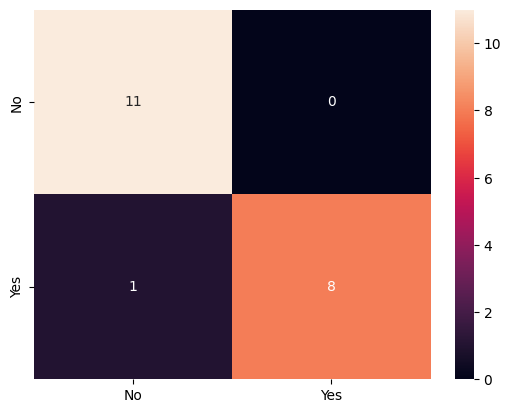

In [7]:
sns.heatmap(cm,annot=True,xticklabels=['No','Yes'],yticklabels=['No','Yes'])

In [31]:
confusion_matrix??

In [33]:
tn, fp, fn, tp = cm.ravel()

In [34]:
print(tn,fp,fn,tp)

11 0 1 8


In [35]:
# Second Method
acc=(tp+tn) / (tn+fp+fn+tp)
print(acc)

0.95


## d) Precision
- of all predicted positive,how amny were actually positive?

In [36]:
# First Method
precision=tp /(tp+fp)
print(precision)

1.0


In [38]:
# Second Method
from sklearn.metrics import precision_score
print(precision_score(y,y_pred))

1.0


## e) Recall of Sensitivity
- of all predicted positive,how amny were actually positive?

In [39]:
# First Method
recall=tp / (tp+fn)
print(recall)

0.8888888888888888


In [41]:
# Second Method
from sklearn.metrics import recall_score
print(recall_score(y,y_pred))

0.8888888888888888


## F) f1-score
> It is hamonic mean of reacall and precision

In [42]:
# First Method
f1= 2 * (precision * recall) / (precision+recall)
print(f1)

0.9411764705882353


In [44]:
# Second Method
from sklearn.metrics import f1_score
print(f1_score(y,y_pred))

0.9411764705882353


## g) specificity
> how good is model for predicting True Negatives

In [46]:
specificity=tn / (tn+fp)
print(specificity)

1.0


## h) Classification report(not in syllabus)

In [47]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



# 251
The task involves building a Decision Tree classifier to predict whether to play tennis based on weather conditions. The dataset
used for this task is the PlayTennis dataset, which contains information about various weather attributes such as outlook,
temperature, humidity, and wind, along with the corresponding decision to play tennis or not. Use PlayTennis.csv for dataset.


In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv('PlayTennis.csv')
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [23]:
x=df.drop('Play Tennis',axis=1)
x=pd.get_dummies(x,drop_first=True)
y=df['Play Tennis']
x

,Outlook_Rain,Outlook_Sunny,Temperature_Hot,Temperature_Mild,Humidity_Normal,Wind_Weak
0,False,True,True,False,False,True
1,False,True,True,False,False,False
2,False,False,True,False,False,True
3,True,False,False,True,False,True
4,True,False,False,False,True,True
5,True,False,False,False,True,False
6,False,False,False,False,True,False
7,False,True,False,True,False,True
8,False,True,False,False,True,True
9,True,False,False,True,True,True


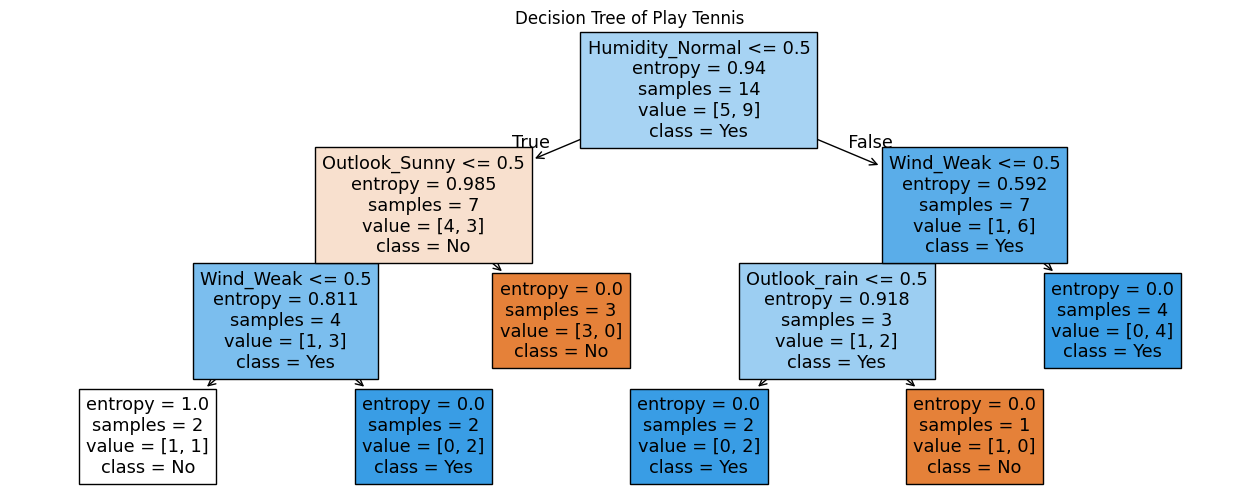

In [25]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=3)

dtree.fit(x,y)

y_pred=dtree.predict(x)

plt.figure(figsize=(16,6))
# plot_tree(dtree)
plot_tree(dtree,filled=True,feature_names=['Outlook_rain','Outlook_Sunny','Temperature_Hot','Temperature_Mild','Humidity_Normal','Wind_Weak'],
          class_names=['No','Yes'])
plt.title('Decision Tree of Play Tennis')
plt.show()

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

[[5 0]
 [1 8]]
              precision    recall  f1-score   support

          No       0.83      1.00      0.91         5
         Yes       1.00      0.89      0.94         9

    accuracy                           0.93        14
   macro avg       0.92      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14



# 252
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of
whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug
A, Drug B, Drug c, Drug x and y.
Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The
feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient
responded to.
It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to
predict the class of a unknown patient, or to prescribe it to a new patient. Use drug200.csv for dataset.

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
df=pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [29]:
x=df.drop('Drug',axis=1)
x=pd.get_dummies(x,drop_first=True)
y=df['Drug']

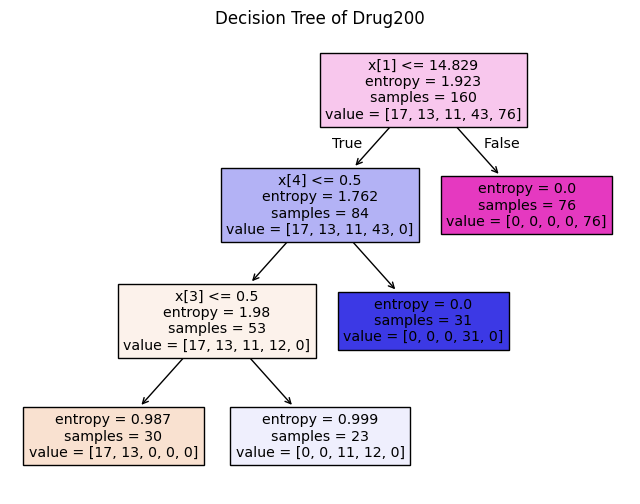

In [30]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=3)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
dtree.fit(x_train,y_train)

y_pred=dtree.predict(x_test)

plt.figure(figsize=(8,6))
# plot_tree(dtree)
plot_tree(dtree,filled=True)
plt.title('Decision Tree of Drug200')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))

[[ 6  0  0  0  0]
 [ 3  0  0  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
